In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lifelines
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test
from lifelines.datasets import load_dd
from lifelines import CoxPHFitter

In [34]:
data = load_dd()

The data set contains the lifetimes of political leaders around the world. 

In [35]:
data.head(10)
# The field observed denotes if event is observed or not (if ==0, censored)
data[data.ctryname == 'Bulgaria'].head(10)

,ctryname,cowcode2,politycode,un_region_name,un_continent_name,ehead,leaderspellreg,democracy,regime,start_year,duration,observed
217,Bulgaria,355,355.0,Eastern Europe,Europe,Georgi Dimitrov,Georgi Dimitrov.Bulgaria.1946.1948.Civilian Dict,Non-democracy,Civilian Dict,1946,3,0
218,Bulgaria,355,355.0,Eastern Europe,Europe,Vasil Petrov Kolarov,Vasil Petrov Kolarov.Bulgaria.1949.1949.Civili...,Non-democracy,Civilian Dict,1949,1,0
219,Bulgaria,355,355.0,Eastern Europe,Europe,Vulko Chervenkov,Vulko Chervenkov.Bulgaria.1950.1953.Civilian Dict,Non-democracy,Civilian Dict,1950,4,1
220,Bulgaria,355,355.0,Eastern Europe,Europe,Todor Zhivkov,Todor Zhivkov.Bulgaria.1954.1988.Civilian Dict,Non-democracy,Civilian Dict,1954,35,1
221,Bulgaria,355,355.0,Eastern Europe,Europe,Peter Mladenov,Peter Mladenov.Bulgaria.1989.1989.Civilian Dict,Non-democracy,Civilian Dict,1989,1,1
222,Bulgaria,355,355.0,Eastern Europe,Europe,Dimitur Popov,Dimitur Popov.Bulgaria.1990.1990.Mixed Dem,Democracy,Mixed Dem,1990,1,1
223,Bulgaria,355,355.0,Eastern Europe,Europe,Filip Dimitrov,Filip Dimitrov.Bulgaria.1991.1991.Mixed Dem,Democracy,Mixed Dem,1991,1,1
224,Bulgaria,355,355.0,Eastern Europe,Europe,Lyuben Berov,Lyuben Berov.Bulgaria.1992.1993.Mixed Dem,Democracy,Mixed Dem,1992,2,1
225,Bulgaria,355,355.0,Eastern Europe,Europe,Reneta Indzhova,Reneta Indzhova.Bulgaria.1994.1994.Mixed Dem,Democracy,Mixed Dem,1994,1,1
226,Bulgaria,355,355.0,Eastern Europe,Europe,Zhan Videnov,Zhan Videnov.Bulgaria.1995.1996.Mixed Dem,Democracy,Mixed Dem,1995,2,1


In [36]:
#What types of regimes are there? 
data.regime.value_counts()

Parliamentary Dem    585
Civilian Dict        330
Presidential Dem     327
Mixed Dem            275
Military Dict        236
Monarchy              55
Name: regime, dtype: int64

In [37]:
#What is the proportion of democratic regimes vs non-democratic regimes? 
data.democracy.value_counts()/data.democracy.shape[0]

Democracy        0.656527
Non-democracy    0.343473
Name: democracy, dtype: float64

In [38]:
#How many democratic and non-democratic regimes there are in each country? 
data.groupby('ctryname')['democracy'].value_counts()

ctryname                  democracy    
Afghanistan               Non-democracy    10
Albania                   Democracy         7
                          Non-democracy     2
Algeria                   Non-democracy     7
Andorra                   Democracy         3
Angola                    Non-democracy     2
Antigua & Barbuda         Democracy         3
Argentina                 Democracy        12
                          Non-democracy     8
Armenia                   Democracy         9
Australia                 Democracy        12
Austria                   Democracy        10
Azerbaijan                Non-democracy     4
Bahamas                   Democracy         4
Bahrain                   Non-democracy     2
Bangladesh                Non-democracy     8
                          Democracy         5
Barbados                  Democracy         7
Belarus                   Non-democracy     2
Belgium                   Democracy        18
Belize                    Democracy     

In [39]:
#what is the longest ruling regime?
data.duration.describe()
#apparently it is 47 years

count    1808.000000
mean        5.043695
std         6.208406
min         1.000000
25%         1.000000
50%         3.000000
75%         6.000000
max        47.000000
Name: duration, dtype: float64

In [40]:
data[data.duration == 47.0]

,ctryname,cowcode2,politycode,un_region_name,un_continent_name,ehead,leaderspellreg,democracy,regime,start_year,duration,observed
375,Cuba,40,40.0,Caribbean,Americas,Fidel Castro Ruz,Fidel Castro Ruz.Cuba.1959.2005.Civilian Dict,Non-democracy,Civilian Dict,1959,47,1
864,Jordan,663,663.0,Western Asia,Asia,Hussein bin Talal,Hussein bin Talal.Jordan.1952.1998.Monarchy,Non-democracy,Monarchy,1952,47,0


### Kaplan-Meier survival function 

In [41]:
kmf = KaplanMeierFitter()

In [42]:
kmf.fit(durations = data.duration, event_observed = data.observed)

<lifelines.KaplanMeierFitter: fitted with 1808 observations, 340 censored>

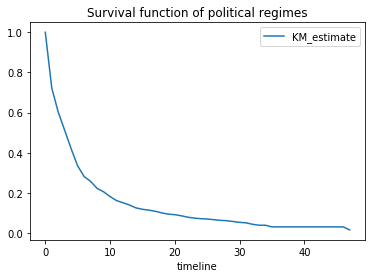

In [43]:
%matplotlib inline
kmf.survival_function_.plot()
plt.title('Survival function of political regimes')

In [44]:
kmf.survival_function_

,KM_estimate
timeline,
0.0,1.000000
1.0,0.721792
2.0,0.601973
3.0,0.510929
4.0,0.418835
5.0,0.334008
6.0,0.280902
7.0,0.256825
8.0,0.221975


In [45]:
kmf.median_

4.0

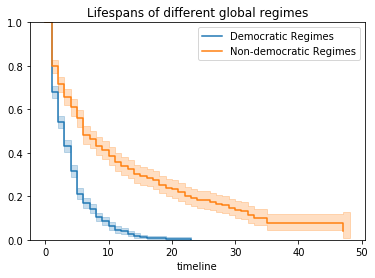

In [46]:
ax = plt.subplot()

dem = (data["democracy"] == "Democracy")
kmf.fit(data.duration[dem], event_observed=data.observed[dem], label="Democratic Regimes")
kmf.plot(ax=ax, ci_force_lines= False)
kmf.fit(data.duration[~dem], event_observed=data.observed[~dem], label="Non-democratic Regimes")
kmf.plot(ax=ax, ci_force_lines=False)

plt.ylim(0, 1);
plt.title("Lifespans of different global regimes")

Non-democratic regimes seem to last much longer! Democratic regimes might also have a natural bias towards 'death' as a deadlime imposed by elections and rules (in some countries, the same person could be ahead of the country for 2 consecutive terms, or 8 years). 

Here it seems obvious that the two groups have different survival rates but in general, to test this difference statistically, we'd perform a logrank test. 

In [47]:
results = logrank_test(data.duration[dem], data.duration[~dem], data.observed[dem], data.observed[~dem], alpha = 0.99)
print(results.print_summary())


alpha=0.99, df=1, null_distribution=chi squared, t_0=-1

test_statistic      p     
      260.4695 0.0000  ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 
None


### Cox Proportional Hazard model  

In [48]:
data_dummies = pd.get_dummies(data.drop(['leaderspellreg', 'un_region_name', 'ehead', 'ctryname', \
                                        'democracy', 'cowcode2', 'politycode'], axis = 1), drop_first = True)

In [49]:
data_dummies.shape

(1808, 12)

In [50]:
# Do we have missing values? 
data_dummies.isnull().sum().sum()

0

In [51]:
cph = CoxPHFitter()
cph.fit(data_dummies, duration_col='duration', event_col='observed', show_progress=True)

Iteration 1: norm_delta = 0.63493, step_size = 0.95000, ll = -9746.28011, seconds_since_start = 0.1
Iteration 2: norm_delta = 0.12520, step_size = 0.95000, ll = -9575.44767, seconds_since_start = 0.2
Iteration 3: norm_delta = 0.03226, step_size = 0.95000, ll = -9564.49149, seconds_since_start = 0.2
Iteration 4: norm_delta = 0.00477, step_size = 0.95000, ll = -9563.96159, seconds_since_start = 0.3
Iteration 5: norm_delta = 0.00030, step_size = 0.95000, ll = -9563.95226, seconds_since_start = 0.4
Iteration 6: norm_delta = 0.00002, step_size = 0.95000, ll = -9563.95222, seconds_since_start = 0.4
Iteration 7: norm_delta = 0.00000, step_size = 0.95000, ll = -9563.95222, seconds_since_start = 0.5
Convergence completed after 7 iterations.


<lifelines.CoxPHFitter: fitted with 1808 observations, 340 censored>

In [52]:
cph.score_

0.64221162818125432

In [53]:
print(cph.print_summary())

n=1808, number of events=1468

                              coef  exp(coef)  se(coef)       z      p  lower 0.95  upper 0.95     
start_year                 -0.0013     0.9987    0.0015 -0.8671 0.3859     -0.0044      0.0017     
un_continent_name_Americas  0.2109     1.2348    0.0980  2.1518 0.0314      0.0188      0.4030    *
un_continent_name_Asia      0.3035     1.3546    0.0920  3.3000 0.0010      0.1232      0.4837  ***
un_continent_name_Europe    0.4514     1.5706    0.0942  4.7948 0.0000      0.2669      0.6360  ***
un_continent_name_Oceania   0.2506     1.2848    0.1376  1.8214 0.0685     -0.0191      0.5202    .
regime_Military Dict        0.2218     1.2483    0.0998  2.2230 0.0262      0.0262      0.4174    *
regime_Mixed Dem            1.1367     3.1166    0.1070 10.6218 0.0000      0.9270      1.3465  ***
regime_Monarchy            -1.1509     0.3164    0.2270 -5.0709 0.0000     -1.5957     -0.7060  ***
regime_Parliamentary Dem    0.7317     2.0787    0.0896  8.1701 0.000

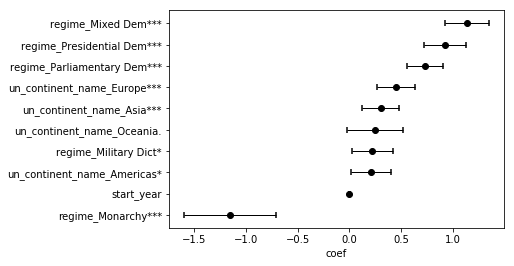

In [54]:
cph.plot()

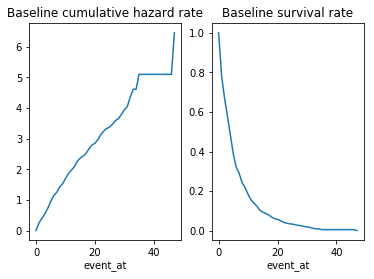

In [55]:
fig, axes = plt.subplots(nrows=1, ncols=2, squeeze=False, sharex=True)
cph.baseline_cumulative_hazard_.plot(ax=axes[0,0], legend=False
                ,title='Baseline cumulative hazard rate')
cph.baseline_survival_.plot(ax=axes[0,1], legend=False
                ,title='Baseline survival rate')

In [56]:
# Randomly select 80% of the data as training
train = data_dummies.sample(frac = 0.8)
test =  data_dummies.drop(train.index)

In [57]:
train.duration.describe()

count    1446.000000
mean        5.123098
std         6.280639
min         1.000000
25%         1.000000
50%         3.000000
75%         6.000000
max        47.000000
Name: duration, dtype: float64

In [58]:
train.head()

,start_year,duration,observed,un_continent_name_Americas,un_continent_name_Asia,un_continent_name_Europe,un_continent_name_Oceania,regime_Military Dict,regime_Mixed Dem,regime_Monarchy,regime_Parliamentary Dem,regime_Presidential Dem
1580,1963,3,1,0,1,0,0,1,0,0,0,0
1488,1986,3,1,0,0,0,0,0,0,0,1,0
686,1954,2,1,1,0,0,0,0,0,0,0,0
33,2004,5,0,1,0,0,0,0,0,0,1,0
732,1947,17,0,0,1,0,0,0,0,0,1,0


In [59]:
#make a prediction after a CP hazard model 
cph = CoxPHFitter()
cph.fit(train, duration_col ='duration' ,event_col= 'observed', show_progress= True )
cph.print_summary()

Iteration 1: norm_delta = 0.65278, step_size = 0.95000, ll = -7585.21243, seconds_since_start = 0.1
Iteration 2: norm_delta = 0.12054, step_size = 0.95000, ll = -7446.64364, seconds_since_start = 0.1
Iteration 3: norm_delta = 0.02797, step_size = 0.95000, ll = -7437.83459, seconds_since_start = 0.2
Iteration 4: norm_delta = 0.00372, step_size = 0.95000, ll = -7437.49306, seconds_since_start = 0.2
Iteration 5: norm_delta = 0.00023, step_size = 0.95000, ll = -7437.48809, seconds_since_start = 0.3
Iteration 6: norm_delta = 0.00001, step_size = 0.95000, ll = -7437.48808, seconds_since_start = 0.3
Iteration 7: norm_delta = 0.00000, step_size = 0.95000, ll = -7437.48808, seconds_since_start = 0.4
Convergence completed after 7 iterations.
n=1446, number of events=1183

                              coef  exp(coef)  se(coef)       z      p  lower 0.95  upper 0.95     
start_year                 -0.0018     0.9982    0.0017 -1.0178 0.3088     -0.0052      0.0016     
un_continent_name_Americas 

In [60]:
#Let's predict the survival function of the test set: the rows are the survival probabilities across time;
# The columns are the number of the observations 
cph.predict_survival_function(test)

,8,13,16,19,27,35,41,43,53,60,...,1763,1765,1767,1770,1775,1783,1791,1798,1804,1805
event_at,,,,,,,,,,,,,,,,,,,,,
0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1.0,0.878282,0.731142,0.733980,0.898563,0.731956,0.842164,0.846233,0.712483,0.726383,0.649920,...,0.710329,0.714624,0.718869,0.723064,0.879291,0.846702,0.856615,0.858257,0.906144,0.899074
2.0,0.809983,0.601414,0.605210,0.840571,0.602501,0.756595,0.762539,0.576691,0.595071,0.496743,...,0.573863,0.579508,0.585108,0.590662,0.811495,0.763226,0.777788,0.780210,0.852117,0.841348
3.0,0.748695,0.497425,0.501741,0.787796,0.498660,0.681768,0.689134,0.469560,0.490234,0.382544,...,0.466400,0.472712,0.478997,0.485252,0.750616,0.689987,0.708132,0.711162,0.802695,0.788797
4.0,0.678300,0.391978,0.396546,0.726230,0.393283,0.598245,0.606930,0.362813,0.384397,0.275617,...,0.359542,0.366084,0.372626,0.379166,0.680635,0.607938,0.629474,0.633089,0.744709,0.727467
5.0,0.602434,0.294425,0.298912,0.658601,0.295706,0.511329,0.521041,0.266155,0.287012,0.185901,...,0.263027,0.269292,0.275592,0.281925,0.605143,0.522171,0.546452,0.550553,0.680565,0.660066
6.0,0.541481,0.227614,0.231820,0.603176,0.228813,0.444002,0.454231,0.201433,0.220696,0.130459,...,0.198571,0.204311,0.210111,0.215969,0.544429,0.455424,0.481182,0.485556,0.627610,0.604801
7.0,0.511180,0.198087,0.202095,0.575220,0.199229,0.411418,0.421798,0.173304,0.191511,0.107755,...,0.170612,0.176014,0.181487,0.187029,0.514225,0.423009,0.449249,0.453718,0.600757,0.576915
8.0,0.465935,0.158397,0.162050,0.532924,0.159437,0.363927,0.374394,0.136045,0.152427,0.079216,...,0.133643,0.138469,0.143379,0.148373,0.469096,0.375618,0.402247,0.406805,0.559932,0.534712


In [61]:
# If we want to predict when is the most likely period of 'death' for each observation, we can take an expectatioin
# of the survival function. 
prediction = cph.predict_expectation(test)
prediction.tail(20)

,0
1723,4.33262
1725,3.87754
1729,3.95778
1734,3.99857
1737,4.02326
1738,4.03153
1742,9.46592
1753,5.14423
1755,5.19796
1758,8.86944


In [62]:
# We can calculate the error: i.e. our prediction minus the real duration in office, and some metrics about it
exp = cph.predict_expectation(test).join(test.duration)
exp.columns = ['predicted_duration', 'observed_duration']
exp.head()
exp['errors'] =  exp.predicted_duration -exp.observed_duration
mae = np.mean(np.abs(exp.errors))
mse = np.mean(np.square(exp.errors))
print('MAE: ', mae)
print('MSE: ', mse)
#print(errors)
print(exp.head(50))

MAE:  4.73196129632
MSE:  43.5073373898
    predicted_duration  observed_duration    errors
8              12.1326                  5   7.13262
13             4.49303                  5 -0.506966
16             4.55855                  3   1.55855
19             14.6421                  3   11.6421
27             4.51165                 11  -6.48835
35             8.99346                  3   5.99346
41               9.282                  2     7.282
43             4.09832                  2   2.09832
53              4.3866                  2    2.3866
60             3.11597                  7  -3.88403
61             3.16005                  1   2.16005
62              3.1664                  1    2.1664
63             4.60865                  3   1.60865
67             4.82359                  3   1.82359
68             4.85369                  1   3.85369
74             5.23047                  2   3.23047
77             2.44254                  3  -0.55746
80             2.55012  

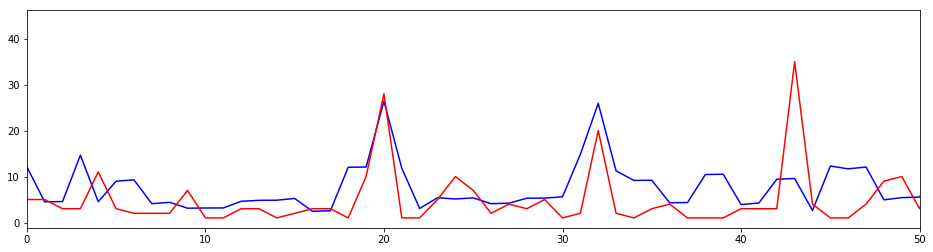

In [63]:
#We can also plot the predicted vs the observed values
plt.figure(figsize=(16,4))
plt.plot(exp['predicted_duration'].values, 'blue')
plt.plot(exp['observed_duration'].values, 'red')
plt.xlim([0,50])
plt.show()

We see that our predictions are sometimes deviating a lot from the real duration of the political regime. There are a number of reasons for this. First of all, the performance could approve as we include our features. Second, especially in non-democratic regimes, predicting how long a leader will stay in power is very difficult (as often their regime ends when they die). 
Survival analysis might not be the most appropriate way to analyze a problem but the biggest advantage over treating a problem as a classification task, is that we instead predict a whole distribution instead of a single one. 